# Proyecto Showz

## Introduccion 
Para el desarrollo de este proyecto, buscamos optimizar los gastos de marketing basando la investigación en el análisis de datos de comportamiento de los usuarios. A su vez, se establecerán cohortes de clientes con el objetivo de entender cómo, cuándo y cuánto aportan a la compañía. Este enfoque nos permitirá identificar patrones de uso, momentos clave en el ciclo de vida del cliente y calcular el retorno de la inversión en adquisición, facilitando así una mejor toma de decisiones estratégicas.

Contamos con los registros del servidor con los siguientes datasets:
- visits.csv: visitas al sitio (ID, fuente, timestamp, etc.).

- orders.csv: pedidos (cliente, fecha, importe, etc.).

- costs.csv: gastos de marketing (fecha, canal, inversión).

# Objetivo General 
``Optimizar los gastos de marketing entendiendo cómo, cuándo y cuánto aportan los clientes.``

## Descripcion de los datos
La tabla `visits` (registros del servidor con datos sobre las visitas al sitio web):

- Uid: identificador único del usuario.
- Device: dispositivo del usuario.
- Start Ts: fecha y hora de inicio de la sesión.
- End Ts: fecha y hora de término de la sesión.
- Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

Todas las fechas de esta tabla están en formato AAAA-MM-DD.

La tabla `orders` (datos sobre pedidos):

- Uid: identificador único del usuario que realiza un pedido.
- Buy Ts: fecha y hora del pedido. Revenue: el ingreso de Showz por el pedido.

La tabla `costs` (datos sobre gastos de marketing):

- source_id: identificador de la fuente de anuncios.
- dt: fecha.
- costs: gastos en esta fuente de anuncios en este día.

In [3808]:
# Cargar todas las librerias
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3809]:
# Designar las variables de los Dataframe 
visits= pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto Spring 9/visits_log_us.csv', sep=',') 
orders=pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto Spring 9/orders_log_us.csv', sep=',')
costs=pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto Spring 9/costs_us.csv', sep=',')

## Nombres asignados a los DataFrames

Para garantizar un desarrollo estructurado y eficiente del proyecto, se asignaron nombres descriptivos a los *DataFrames* generados a partir de las consultas a los servidores. Esta práctica permite mantener un flujo de trabajo organizado y facilita la interpretación de los resultados en las distintas etapas del análisis. Las asignaciones realizadas son las siguientes:

- `visits`: corresponde al resultado de la consulta `visits_log_us`.
- `orders`: corresponde al resultado de la consulta `orders_log_us`.
- `costs`: corresponde al resultado de la consulta `costs_us`.

A continuación, el análisis exploratorio de los datos.


In [3810]:
# Visualizacion preliminar de los dataframes:

visits.info()

# estandarizar datos:
for col in visits.select_dtypes(include='object'):
    visits[col] = visits[col].str.lower()

print('\n', visits.sample(n=5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

          Device               End Ts  Source Id             Start Ts  \
83642   desktop  2018-05-08 22:24:00          4  2018-05-08 22:18:00   
318988  desktop  2018-02-05 22:24:00          3  2018-02-05 22:23:00   
108028  desktop  2017-08-09 12:16:00          5  2017-08-09 11:47:00   
253362    touch  2018-02-15 11:47:00          4  2018-02-15 11:41:00   
256617  desktop  2017-10-03 11:48:00         10  2017-10-03 11:47:00   

                         Uid  
83642    6574488256926126490  
318988  14021961945829555911  
108028   32289045794

In [3811]:
# Visualizacion preliminar de los dataframes:

orders.info()

print('\n', orders.sample(n=5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

                     Buy Ts  Revenue                   Uid
17618  2017-11-15 11:37:00     1.83   6111240346918455958
32548  2018-02-02 10:14:00     1.75   4575763306520249909
44446  2018-04-17 21:58:00     6.11  10107842341766707735
7777   2017-09-14 15:52:00    12.22  18277424335970395267
34469  2018-02-13 07:02:00     0.61   9535740253260069511


In [3812]:
# Visualizacion preliminar de los dataframes:

costs.info()

print('\n', costs.sample(n=5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

       source_id          dt   costs
241           1  2018-01-28   61.70
605           2  2018-01-29  270.67
1364          4  2018-03-03    6.31
2042          9  2018-01-13   16.15
114           1  2017-09-23   18.34


## Correcion de tipo de datos

Dado que la naturaleza de los datos requiere un procesamiento adecuado, es fundamental contar con una estructura organizada y coherente. Por esta razón, se ha llevado a cabo una reorganización estratégica de los conjuntos de datos, lo cual permitirá facilitar su análisis en cada etapa del proyecto. A continuación, se detallan las transformaciones realizadas específicamente en los dataframes visits, orders y costs:

- En ``visits``, se renombran las columnas para eliminar espacios y facilitar el manejo del código (Start Ts a start_ts, End Ts a end_ts, etc.), y se convierten las columnas de fechas al formato datetime.

- En ``orders``, se transforma la columna Buy Ts a buy_ts y se asegura que los ingresos (revenue) estén en el tipo numérico correcto.

- En ``costs``, se homogeneizan los nombres (dt para la fecha, costs para los gastos) y se convierte la columna de fechas a datetime.

Esta preparación garantiza que los datos estén listos para los análisis de comportamiento, cohortes y rentabilidad que se desarrollarán a lo largo del proyecto.

In [3813]:
# Renombrar columnas para que sean más fáciles de manejar

visits.columns = ['device','end_ts', 'source_id','start_ts','uid']
orders.columns = ['buy_ts', 'revenue','uid']
costs.columns = ['source_id', 'dt', 'costs']

## Convertir fechas a datetime

visits['start_ts']=pd.to_datetime(visits['start_ts'])
visits['end_ts']=pd.to_datetime(visits['end_ts'])

orders['buy_ts']=pd.to_datetime(orders['buy_ts'])

costs['dt']=pd.to_datetime(costs['dt'])

# Revisar los tipos
print(visits.dtypes)
print(orders.dtypes)
print(costs.dtypes)



device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object
buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object
source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object


# Visitas

## ¿Cuántas personas lo usan cada día, semana y mes?

- Se tiene que implementar una clasificación de las fechas para establecer la cantidad de personas y calcular un promedio mensual, semanal y diario con fines de análisis.

In [3814]:
# Crear columnas de dia, semana y mes

visits['date']=visits['start_ts'].dt.date
visits['week']=visits['start_ts'].dt.isocalendar().week 
visits['month']=visits['start_ts'].dt.month
visits['year']=visits['start_ts'].dt.isocalendar().year
print(visits.sample(n=5))

         device              end_ts  source_id            start_ts  \
154317  desktop 2017-08-31 12:32:00          3 2017-08-31 12:13:00   
221063  desktop 2018-02-17 12:01:00          4 2018-02-17 11:33:00   
116726  desktop 2017-11-28 18:09:00          1 2017-11-28 18:05:00   
191137  desktop 2018-05-25 13:40:00          5 2018-05-25 12:01:00   
231473  desktop 2017-12-05 15:00:00          5 2017-12-05 14:56:00   

                         uid        date  week  month  year  
154317  11642583697037470317  2017-08-31    35      8  2017  
221063   6996285297246048988  2018-02-17     7      2  2018  
116726    991061351213707617  2017-11-28    48     11  2017  
191137  13482259146982443019  2018-05-25    21      5  2018  
231473  16259624672078593322  2017-12-05    49     12  2017  


In [3815]:
# Usuarios únicos por día
daily_users = visits.groupby('date')['uid'].nunique().mean()

print(f"En promedio {round(daily_users)} usuarios visitaron la plataforma a nivel diario.")

# Usuarios únicos por semana
wau_total =visits.groupby(['year', 'week'])['uid'].nunique().mean()



print(f"En promedio {round(wau_total)} usuarios visitaron la plataforma a nivel semanal.")

# Usuarios únicos por mes
mau_total = visits.groupby(['year','month'])['uid'].nunique().mean()


print(f"En promedio {round(mau_total)} usuarios visitaron la plataforma a nivel anual.")

En promedio 908 usuarios visitaron la plataforma a nivel diario.
En promedio 5716 usuarios visitaron la plataforma a nivel semanal.
En promedio 23228 usuarios visitaron la plataforma a nivel anual.


- En el análisis del comportamiento de los usuarios, se observa que la plataforma recibió, en promedio, ``908 usuarios únicos`` por día. A nivel semanal, esta cifra se incrementa a ``5,716 usuarios únicos``, lo que indica una recurrencia moderada en el uso del servicio. Finalmente, al analizar el tráfico anual, se identificó un promedio de ``23,228 usuarios únicos``, lo que permite dimensionar el alcance general de la plataforma a lo largo del año.

## ¿Cuántas sesiones hay por día?

In [3816]:
# Cantidad de sesiones por día
daily_sessions = visits.groupby('date')['uid'].count().mean()

print(f"En promedio hubo {round(daily_sessions)} sesiones por dia.")


En promedio hubo 987 sesiones por dia.


- En promedio, se registraron aproximadamente ``987 sesiones diarias en la plataforma``, lo que refleja una actividad constante de los usuarios a lo largo del periodo analizado.

## ¿Cuál es la duración de cada sesión?

         device              end_ts  source_id            start_ts  \
202115  desktop 2017-11-12 09:38:00          4 2017-11-12 09:34:00   
212355  desktop 2018-01-30 16:47:00          4 2018-01-30 16:46:00   
46481     touch 2018-02-22 17:21:00          1 2018-02-22 17:15:00   
269801  desktop 2017-09-18 12:17:00          3 2017-09-18 12:16:00   
262830  desktop 2018-01-26 18:18:00          2 2018-01-26 18:17:00   
97037   desktop 2017-11-23 09:56:00          3 2017-11-23 09:54:00   
255956  desktop 2018-05-20 19:41:00          4 2018-05-20 19:27:00   
119761  desktop 2018-05-10 17:05:00          4 2018-05-10 16:57:00   
220837  desktop 2017-11-01 21:18:00          4 2017-11-01 21:16:00   
46628   desktop 2018-05-22 06:33:00          5 2018-05-22 06:32:00   

                         uid        date  week  month  year  session_duration  
202115   2896661251007774571  2017-11-12    45     11  2017               4.0  
212355   7328200534609479258  2018-01-30     5      1  2018          

<Axes: >

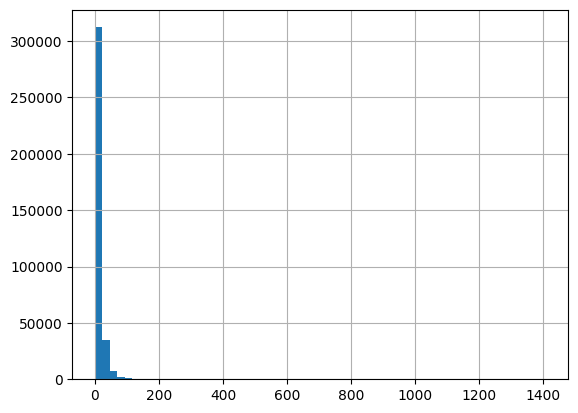

In [3817]:
# Duracion promedio de cada sesión en minutos 

visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds/60
print(visits.sample(n=10))
visits['session_duration'].hist(bins=60)




- Teniendo en cuenta que la distribucion no representan un comportamiento normal se hace necesario recurrir a la 'moda' de los datos para saber con certeza la duracion de cada usuario real.

In [3818]:
# Media y moda de los datos
 
avg_per_day = visits['session_duration'].mean()
asl_per_day = visits['session_duration'].mode()

print(f"\nLa duracion promedio de cada sesion es de {round(avg_per_day)} minutos")
print(f"\nLa duracion en minutos de cada sesion teniendo en cuenta la moda de los datos oscila entre:\n {round(asl_per_day)}")


La duracion promedio de cada sesion es de 11 minutos

La duracion en minutos de cada sesion teniendo en cuenta la moda de los datos oscila entre:
 0    1.0
Name: session_duration, dtype: float64


- La duración promedio de cada sesión en la plataforma es de aproximadamente 11 minutos, lo que sugiere que los usuarios dedican un tiempo moderado a navegar o interactuar con el sitio durante cada visita.

Por otro lado, al observar la moda de la duración de las sesiones —es decir, la duración más frecuente entre todas las registradas— se encuentra que la mayoría de las sesiones tienden a durar alrededor de 1 minuto. Esto indica que, aunque en promedio los usuarios permanecen 11 minutos, una gran proporción de sesiones son muy breves, lo que podría deberse a visitas rápidas o usuarios que abandonan el sitio sin interactuar mucho.

Este contraste entre la media y la moda resalta la importancia de considerar la distribución completa de las duraciones y no solo los valores promedio al evaluar el compromiso de los usuarios.

## ¿Con qué frecuencia los usuarios regresan?

- Para el análisis de la frecuencia de usuarios que regresan, se considerará cuidadosamente el factor "sticky", una métrica comúnmente empleada para evaluar el compromiso del usuario. Específicamente, se calcularán los indicadores sticky semanal y mensual, los cuales serán fundamentales para el análisis del comportamiento y la retención de los usuarios en la plataforma 

In [3819]:
# Factor semanal y mensual 

sticky_wau=(daily_users/wau_total)*100
sticky_mau=(daily_users/mau_total)*100

print('sticky_wau',sticky_wau)
print('sticky_mau',sticky_mau)

sticky_wau 15.88440861589881
sticky_mau 3.908969652437603


- ``Sticky semanal = 15.88%``

    Esto significa que, en promedio, el 15.88% de los usuarios semanales utilizan la plataforma a diario.

    En otras palabras, de cada 100 usuarios activos en una semana, solo unos 16 usuarios usan el servicio todos los días.

- ``Sticky mensual = 3.91%``

    Esto quiere decir que solo el 3.91% de los usuarios activos en un mes están en la plataforma todos los días.

    O sea, de cada 100 usuarios mensuales, menos de 4 son realmente activos todos los días.

# Ventas

## ¿Cuándo empieza la gente a comprar?

               buy_ts  revenue                   uid      first_buy_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   
5 2017-06-01 08:43:00     0.18  10402394430196413321 2017-06-01 08:43:00   
6 2017-06-01 08:54:00     1.83  12464626743129688638 2017-06-01 08:54:00   
7 2017-06-01 09:22:00     1.22   3644482766749211722 2017-06-01 09:22:00   
8 2017-06-01 09:22:00     3.30  17542070709969841479 2017-06-01 09:22:00   
9 2017-06-01 09:23:00     0.37   1074355127080856382 2017-06-01 09:23:00   

   first_buy_month  first_buy_year  buy_ts_month  
0                6            2017             6  
1                6            2017             6  
2         

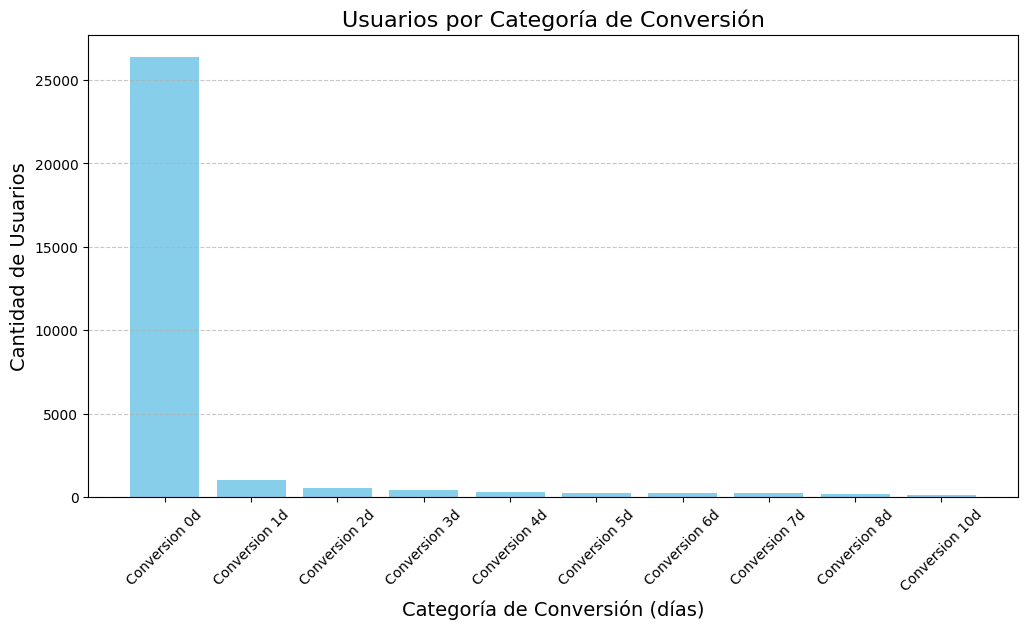

In [3820]:
# Creacion de columnas 
first_visit_date = visits.groupby('uid')['start_ts'].min()
first_order_date= orders.groupby('uid')['buy_ts'].min()

# Renombrar las columnas
first_visit_date.name ='first_visit_date'
first_order_date.name ='first_buy_date'

# Unir a los dataframes
visits = visits.join(first_visit_date, on='uid')
orders=orders.join(first_order_date, on='uid')

# Mes de la primera compra

orders['first_buy_month'] = orders['first_buy_date'].dt.month
orders['first_buy_year'] = orders['first_buy_date'].dt.year
orders['buy_ts_month'] = orders['buy_ts'].dt.month

print(orders.head(10))

# dia de conversion 
orders_visits = pd.merge(visits, orders, on='uid')
orders_visits['conversion_days'] = (orders_visits['first_buy_date'] - orders_visits['first_visit_date']).dt.days
print(orders_visits.head(5))
orders_visits['conversion_category'] = 'Conversion ' + orders_visits['conversion_days'].astype(str) + 'd'
conversion_day= orders_visits.groupby('conversion_category')['uid'].nunique().sort_values(ascending=False)
conversion_day_top10=conversion_day.head(10)

print(conversion_day.head(10))


# Grafica de conversion 

plt.figure(figsize=(12,6))
plt.bar(conversion_day_top10.index, conversion_day_top10.values, color='skyblue')

# Títulos y etiquetas
plt.title('Usuarios por Categoría de Conversión', fontsize=16)
plt.xlabel('Categoría de Conversión (días)', fontsize=14)
plt.ylabel('Cantidad de Usuarios', fontsize=14)
plt.xticks(rotation=45)  # Rotar las etiquetas para que se lean mejor
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()



## ¿Cuántos pedidos hacen durante un período de tiempo dado?

                  uid    revenue  buy_ts
first_buy_month                         
1                3373  181362.28   32393
2                3651   89378.45   22518
3                3533  401114.22   47916
4                2276   84302.22   11340
5                2988   35600.77    7579
6                   1       3.42       1

 20291.166666666668


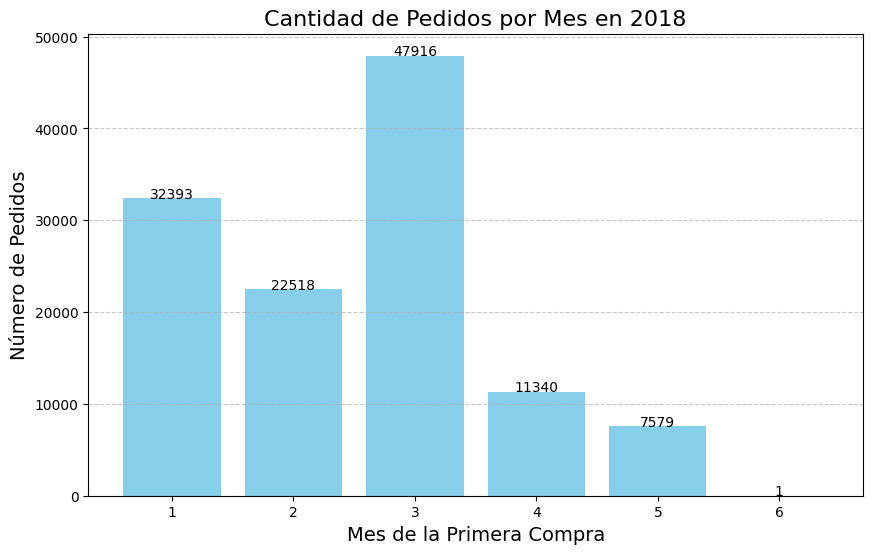

In [3821]:
# cohorte_2018
orders_2018 = orders_visits[orders_visits['first_buy_year'] == 2018].reset_index()

cohort_grouped = orders_2018.groupby('first_buy_month').agg(
    {'uid': 'nunique', 'revenue': 'sum','buy_ts':'count'})

print(cohort_grouped)

avg_orders_2028=cohort_grouped['buy_ts'].mean()

print( '\n', avg_orders_2028 )

# grafico 

plt.figure(figsize=(10, 6))
plt.bar(cohort_grouped.index, cohort_grouped['buy_ts'], color='skyblue')

# Títulos y etiquetas
plt.title('Cantidad de Pedidos por Mes en 2018', fontsize=16)
plt.xlabel('Mes de la Primera Compra', fontsize=14)
plt.ylabel('Número de Pedidos', fontsize=14)

# Mostrar los valores en las barras (opcional, más pro)
for index, value in enumerate(cohort_grouped['buy_ts']):
    plt.text(cohort_grouped.index[index], value + 5, str(value), ha='center', fontsize=10)

# Mostrar la gráfica
plt.xticks(cohort_grouped.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



## ¿Cuál es el tamaño promedio de compra?

In [3822]:
cohort_grouped['AOV'] = cohort_grouped['revenue'] / cohort_grouped['buy_ts']

# Mostrar la tabla con el AOV
print(cohort_grouped[['AOV']])

                      AOV
first_buy_month          
1                5.598811
2                3.969200
3                8.371196
4                7.434058
5                4.697291
6                3.420000


## ¿Cuánto dinero traen? (LTV)

In [3823]:


orders_2018['buy_ts'] = pd.to_datetime(orders_2018['buy_ts'])
orders_2018['buy_month'] = orders_2018['buy_ts'].values.astype('datetime64[M]')


first_orders = orders_2018.groupby('uid').agg({'buy_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_buy_months']

cohort_sizes = (
    first_orders.groupby('first_buy_months')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_buy_months', 'n_buyers']
cohort_sizes.head()

margin_rate = 0.5

orders_ = pd.merge(orders_2018, first_orders, on='uid')
cohorts = (
    orders_.groupby(['first_buy_months', 'buy_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
report = pd.merge(cohort_sizes, cohorts, on='first_buy_months')

margin_rate=0.5

report['gp'] = report['revenue'] * margin_rate


report['age'] = (
    (report['buy_month'] - report['first_buy_months']) / np.timedelta64(1, 'D')
) / 30.44
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

print(report)


output = report.pivot_table(
    index='first_buy_months', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')

output.fillna('')


   first_buy_months  n_buyers  buy_month    revenue         gp  age        ltv
0        2018-01-01      3373 2018-01-01   63783.17  31891.585    0   9.454961
1        2018-01-01      3373 2018-02-01   41390.72  20695.360    1   6.135594
2        2018-01-01      3373 2018-03-01   53406.44  26703.220    2   7.916757
3        2018-01-01      3373 2018-04-01   14386.59   7193.295    3   2.132610
4        2018-01-01      3373 2018-05-01    8395.36   4197.680    4   1.244495
5        2018-02-01      3651 2018-02-01   46827.12  23413.560    0   6.412917
6        2018-02-01      3651 2018-03-01   25339.24  12669.620    1   3.470178
7        2018-02-01      3651 2018-04-01   10010.64   5005.320    2   1.370945
8        2018-02-01      3651 2018-05-01    7201.45   3600.725    3   0.986230
9        2018-03-01      3533 2018-03-01  176797.15  88398.575    0  25.020825
10       2018-03-01      3533 2018-04-01  143062.11  71531.055    1  20.246548
11       2018-03-01      3533 2018-05-01   81254.96 

age,0,1,2,3,4
first_buy_months,,,,,
2018-01-01,9.454961,6.135594,7.916757,2.13261,1.244495
2018-02-01,6.412917,3.470178,1.370945,0.98623,
2018-03-01,25.020825,20.246548,11.499428,,
2018-04-01,8.733746,9.786074,,,
2018-05-01,5.957291,,,,
2018-06-01,1.710000,,,,


In [3824]:
ltv_201801 = output.loc['2018-01-01'].sum()

print(ltv_201801)

26.884417432552624
